In [1]:
import pandas as pd


# Synthetic market basket data (each row is a transaction)
dataset = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'eggs'],
    ['bread', 'eggs'],
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'butter'],
    ['butter', 'eggs'],
    ['bread', 'eggs'],
    ['milk', 'bread', 'butter', 'eggs']
]

In [3]:
from mlxtend.preprocessing import TransactionEncoder


In [4]:
te=TransactionEncoder()

In [9]:
data=te.fit_transform(dataset)

In [10]:
df = pd.DataFrame(data, columns=te.columns_)


In [11]:
from mlxtend.frequent_patterns import apriori


In [15]:
model=apriori(df,min_support=0.1,use_colnames=True)

In [16]:
print(model)

    support                     itemsets
0       0.7                      (bread)
1       0.5                     (butter)
2       0.6                       (eggs)
3       0.6                       (milk)
4       0.3              (bread, butter)
5       0.4                (bread, eggs)
6       0.4                (bread, milk)
7       0.2               (eggs, butter)
8       0.3               (milk, butter)
9       0.3                 (milk, eggs)
10      0.1        (bread, eggs, butter)
11      0.2        (bread, milk, butter)
12      0.2          (bread, milk, eggs)
13      0.1         (milk, eggs, butter)
14      0.1  (bread, milk, eggs, butter)


In [19]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(model, metric="confidence", min_threshold=0.5)
print("Association Rules:")
rules

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.5,0.7,0.3,0.600000,0.857143,1.0,-0.05,0.750000,-0.250000,0.333333,-0.333333,0.514286
1,(bread),(eggs),0.7,0.6,0.4,0.571429,0.952381,1.0,-0.02,0.933333,-0.142857,0.444444,-0.071429,0.619048
2,(eggs),(bread),0.6,0.7,0.4,0.666667,0.952381,1.0,-0.02,0.900000,-0.111111,0.444444,-0.111111,0.619048
3,(bread),(milk),0.7,0.6,0.4,0.571429,0.952381,1.0,-0.02,0.933333,-0.142857,0.444444,-0.071429,0.619048
4,(milk),(bread),0.6,0.7,0.4,0.666667,0.952381,1.0,-0.02,0.900000,-0.111111,0.444444,-0.111111,0.619048
5,(milk),(butter),0.6,0.5,0.3,0.500000,1.000000,1.0,0.00,1.000000,0.000000,0.375000,0.000000,0.550000
6,(butter),(milk),0.5,0.6,0.3,0.600000,1.000000,1.0,0.00,1.000000,0.000000,0.375000,0.000000,0.550000
7,(milk),(eggs),0.6,0.6,0.3,0.500000,0.833333,1.0,-0.06,0.800000,-0.333333,0.333333,-0.250000,0.500000
8,(eggs),(milk),0.6,0.6,0.3,0.500000,0.833333,1.0,-0.06,0.800000,-0.333333,0.333333,-0.250000,0.500000
9,"(eggs, butter)",(bread),0.2,0.7,0.1,0.500000,0.714286,1.0,-0.04,0.600000,-0.333333,0.125000,-0.666667,0.321429


In [20]:
strong_rules = rules[(rules['confidence'] >= 0.7) & (rules['lift'] > 1)]
print("Strong Rules:")
strong_rules

Strong Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
19,"(bread, eggs, butter)",(milk),0.1,0.6,0.1,1.0,1.666667,1.0,0.04,inf,0.444444,0.166667,1.0,0.583333
20,"(milk, eggs, butter)",(bread),0.1,0.7,0.1,1.0,1.428571,1.0,0.03,inf,0.333333,0.142857,1.0,0.571429


<Axes: xlabel='lift', ylabel='antecedents'>

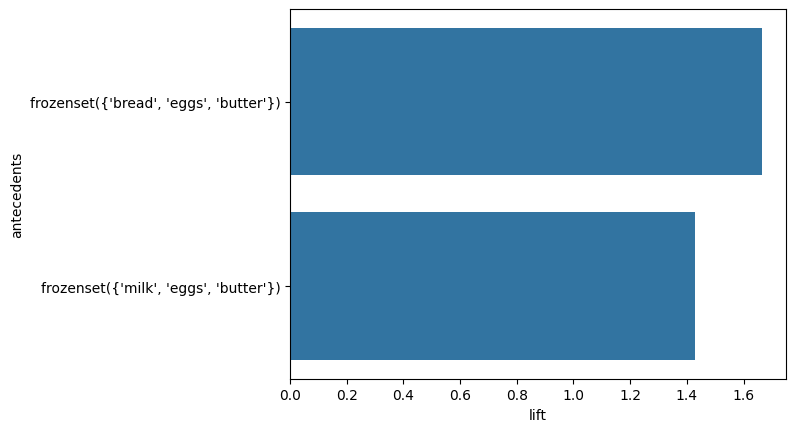

In [22]:
import seaborn as sns
sns.barplot(
    data=strong_rules.sort_values(by='lift', ascending=False),
    x='lift',
    y='antecedents'
)